Тут я исследую материал лекции, сам семинар (который дал препод) лежит в seminar5_2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

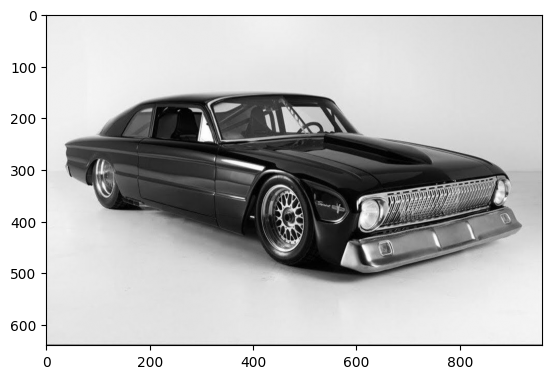

In [2]:
img_gray = cv2.imread('../Seminar_1/data/car.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='grey')

In [11]:
def imshow_gray(img, def_img=img_gray):
    if def_img is not None:
        fig, ax = plt.subplots(ncols=2, figsize= (10,5))
        ax[0].axis('off')
        ax[1].axis('off')
        ax[0].imshow(def_img, cmap='grey') 
        ax[1].imshow(img, cmap='grey')    
    else:
        plt.imshow(img, cmap='grey')

def grad(img):
    '''slide 10 in lecture_3'''
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(Ix**2 + Iy**2)
    orientation = np.arctan2(Iy, Ix)
    return magnitude, orientation

In [6]:
magnitude, orientation = grad(img_gray)

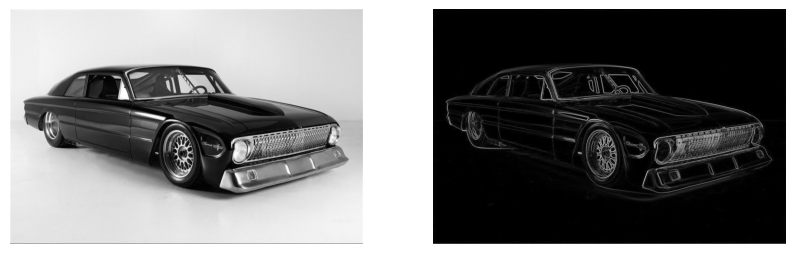

In [9]:
imshow_gray(magnitude)

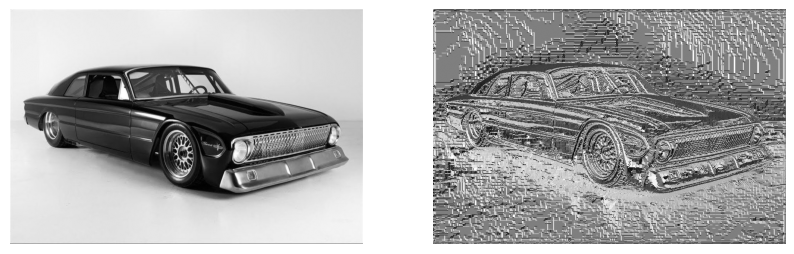

In [10]:
imshow_gray(orientation)

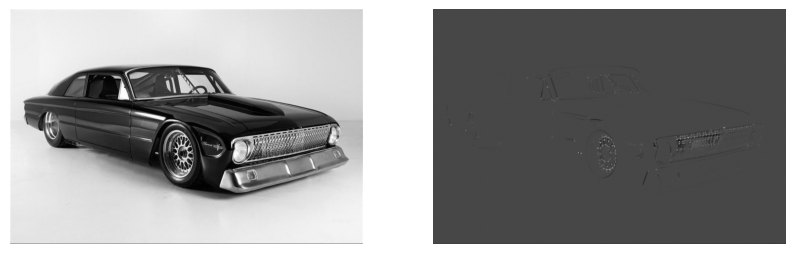

In [14]:
imshow_gray(cv2.cornerHarris(img_gray, blockSize=3, ksize=3, k=0.04))

In [17]:
cv2.goodFeaturesToTrack(img_gray,
    maxCorners=300,
    qualityLevel=0.01,
    minDistance=5).shape

(300, 1, 2)

In [22]:
'''slide 30 in lection_3'''
k = 2 ** (1/3) # три уровня на октаву
sigmas = [1.6, 1.6*k, 1.6*k*k, 1.6*k*k*k]
gauss = [cv2.GaussianBlur(img_gray, (0,0), s) for s in sigmas]
dogs = [gauss[i+1] - gauss[i] for i in range(len(gauss)-1)]

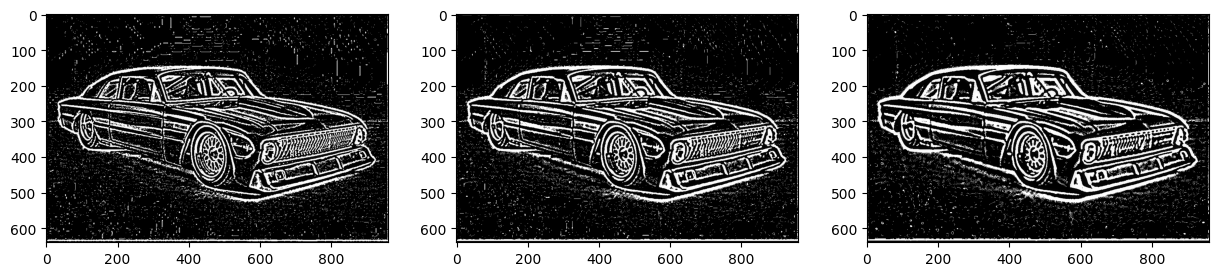

In [31]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
for i in range(len(dogs)):
    ax[i].imshow(dogs[i], cmap='gray')

In [34]:
# --- SIFT ---
sift = cv2.SIFT_create()
kp_s, des_s = sift.detectAndCompute(img_gray, None)
# --- SURF ---
# surf = cv2.xfeatures2d.SURF_create(400)
# kp_u, des_u = surf.detectAndCompute(img_gray, None)
# --- ORB ---
orb = cv2.ORB_create(nfeatures=1000)
kp_o, des_o = orb.detectAndCompute(img_gray, None)

In [43]:
kp_o[0]

< cv2.KeyPoint 000001CB6FF5A580>